# Analysis

## Tasks
 - Find correlation between fields
 - Find correlation of fields with certain properties like:
        - Price
        - Rating
        - Rating count
- Check if we can build a regression / classification model for rating / rating count
- Check if we can build a regression model for price
- Cluster apps to see related apps;
- Check what fields can be used to perform KNN lookup to find similar apps

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("Set1", 8, .75)

In [9]:
df = pd.read_csv("../dataset/processed.data.csv", encoding='utf-8')

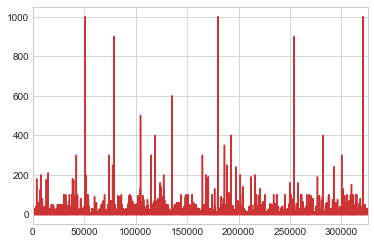

In [12]:
df.price.plot()